In [1]:
%pylab inline
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib notebook

# In the Wien filter filter, the particle will follow a straight trajectory, only when the Lorentz force is compensated by the electric field 

# $$q\vec{E}+q\vec{v}\times\vec{B} = 0 $$


# Where  $\vec{B} = -B_{\bot} \hat{x}; \vec{E} = E \hat{y}; \vec{v} = v \vec{z}$

# $E \hat{y} = -(v \hat{z}) \times( - B_{\bot} \hat{x}) $

# $E \hat{y} = vB_{\bot} \hat{y} $

# $\Rightarrow E = v B_{\bot}$

# The equation of spin motion is given by:

# $$\frac{d\vec{S}}{ds} = \frac{q}{p} \vec{S}\times \vec{\Omega}$$

# Where $\vec{\Omega} = (1+G\gamma)\vec{B}_{\bot} + (G+\frac{1}{\gamma+1})\gamma \frac{\vec{E}\times\vec{\beta}}{c}$, q = -e for the electron

$$ $$

# $$\vec{\Omega} = -\big[(1+G\gamma)B_{\bot} - (G+\frac{1}{\gamma+1})\gamma \frac{vE}{c^2}\big] \hat{x} $$


$$ $$

# The amount of rotation is given by:


# $$\theta_s =\frac{\Omega \text{L}}{B\rho}$$


# $\begin{align*} \theta_s &=\frac{(1+G\gamma)B_{\bot} \text{L}}{B\rho} - (G+\frac{1}{\gamma+1})\gamma \frac{vE \text{L}}{B\rho c^2}  \\ &= \big[ (1+G\gamma) - (G+\frac{1}{\gamma+1})\gamma\beta^2 \big ] \frac{B_{\bot} \text{L}}{B\rho} \\ & =\big[ (1+G\gamma) - (G\gamma+\frac{\gamma}{\gamma+1})(1-\frac{1}{\gamma^2}) \big ] \frac{B_{\bot} \text{L}}{B\rho} \\ &= \big[ 1 + \frac{G}{\gamma}-1+\frac{1}{\gamma}\big ] \frac{B_{\bot} \text{L}}{B\rho} \\ &= \frac{1+G}{\gamma}\frac{B_{\bot} \text{L}}{ B\rho}\end{align*} $

$$ $$

In [3]:
G = 1.159652*10**(-3)   #anomalous g factor
K = 0.25                #kinetic energy in MeV
L = 1                   #length of the rotator
m = 0.511               #mass of eletron in MeV
c = 2.99792458*10**8    #speed of light

In [4]:
E = K+m  # energy of the particle

p = sqrt(E**2-m**2)

In [5]:
Brho = p*10**6/c; gamma = E/m; beta = p/E  
print('the magnetic rigidity is :', Brho)

the magnetic rigidity is : 0.0018810175911592392


# The rotation angle is $\frac{\pi}{2}$

# $$\frac{\pi}{2} = \frac{1+G}{\gamma}\frac{B_{\bot}\text{L}}{B\rho}$$

# $$\Rightarrow B_{\bot} = \frac{\pi}{2}\frac{\gamma B\rho}{(1+G)\text{L}}$$


In [6]:
B = pi/2*gamma*Brho/((1+G)*L)

In [7]:
print('B = %s T'%B) 

B = 0.00439514443959881 T


# $E = vB_{\bot} = \beta c B_{\bot}$

In [8]:
E_field = B*beta*c

In [9]:
print ('E = %s V/m'%E_field)

E = 976388.7306576277 V/m


$ $ 
$ $

# Define a function to calculate the Wien Filter 

In [10]:
def WF(K,L,theta_0):       #Wien Filter Calculator
    
    
    G = 1.159652*10**(-3)  #anomalous g factor
    m = 0.511              #mass of eletron in MeV
    c = 2.99792458*10**8   #speed of light
    
    E = K+m
    
    p = sqrt(E**2-m**2)
        
    Brho = p*10**6/c; gamma = E/m; beta = p/E  
    
    B = theta_0*gamma*Brho/((1+G)*L)
    
    E_field = B*beta*c
    
    thetaB = (1+G*gamma)*B*L/Brho
    thetaE = -(G*gamma+gamma/(1+gamma))*beta*E_field*L/Brho/c
    theta = (1+G)/gamma*B*L/Brho
    
    print('B = %s T'%round(B,5)) 
    print ('E = %s MV/m'%f'{E_field/1E6:.5}')
    print('spin rotation due to the B field term :', round(thetaB,3))
    print('spin rotation due to the E field term :', round(thetaE,3))
    print('total amount of rotation : %s rad'%round(theta,3))

In [11]:
WF(.25,1,pi/2) # 0.25: particle kinetic energy in MeV; 1: Length of the Rotator in m; 
                # pi/2: rotation angle in rad

B = 0.0044 T
E = 0.97639 MV/m
spin rotation due to the B field term : 2.341
spin rotation due to the E field term : -0.77
total amount of rotation : 1.571 rad


<IPython.core.display.Javascript object>


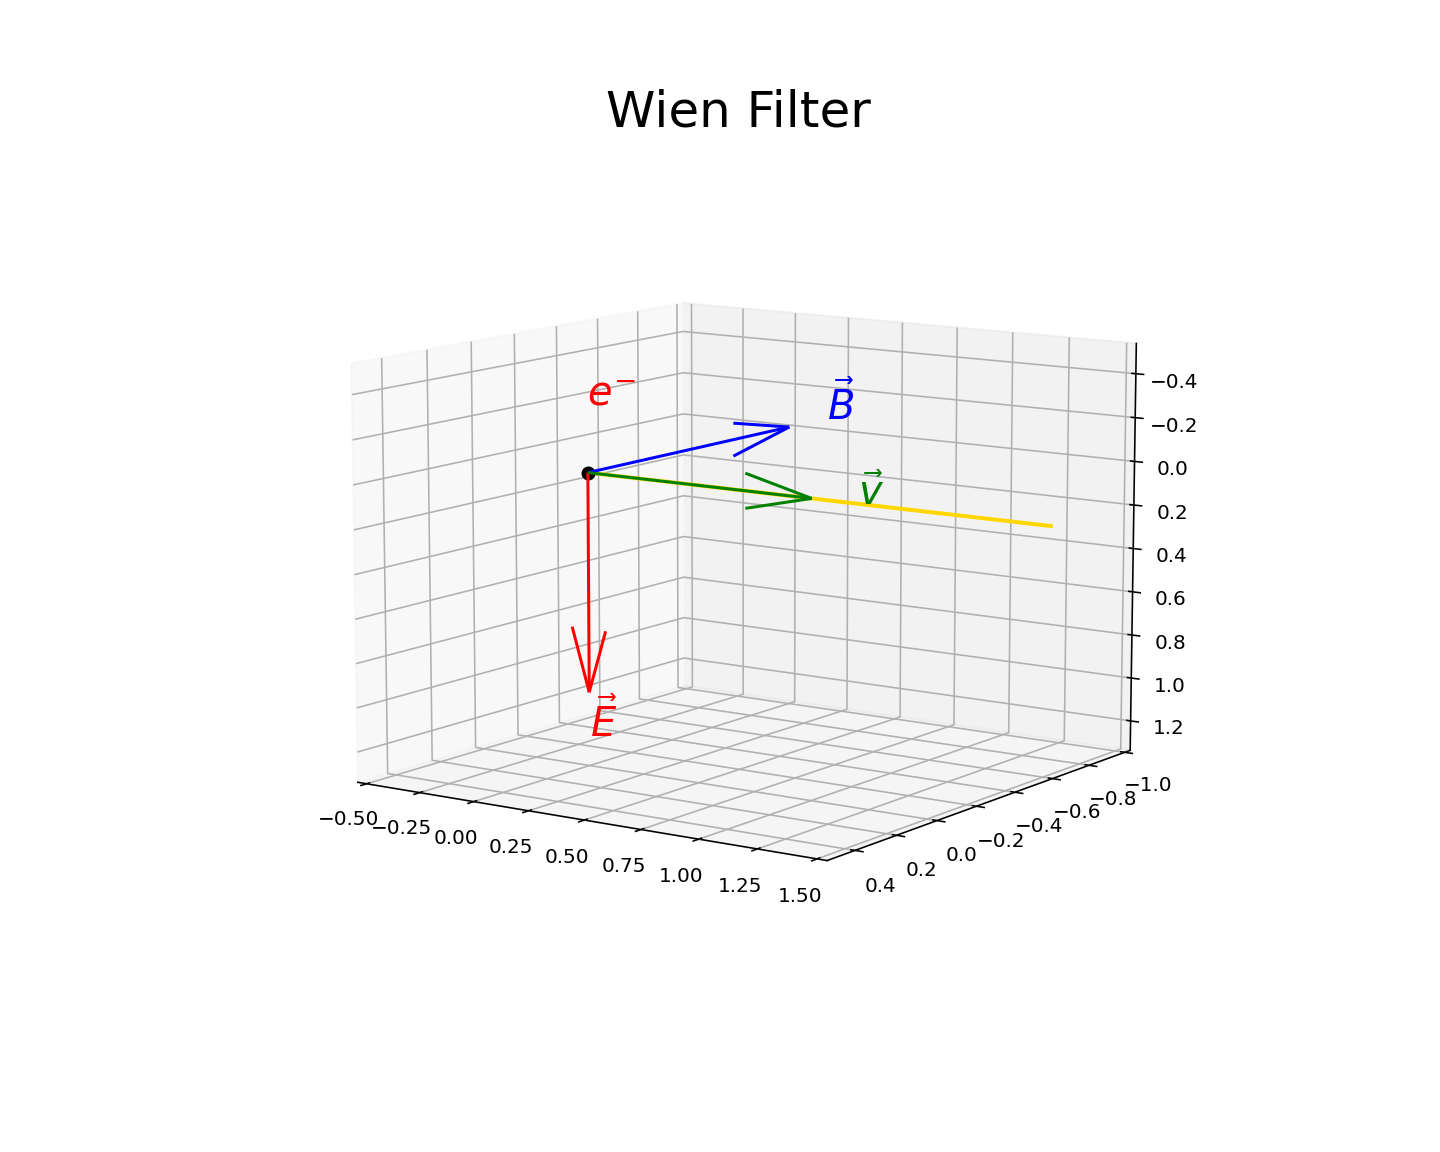

In [12]:
fig = figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
    
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-1, 0.5])
ax.set_zlim([-0.5, 1.3])
        
ax.quiver(0, 0, 0, 0, -1, 0, color ='blue',alpha = 1)
ax.text(0, -1.2, 0, r'$\vec{B}$', color='blue', size = 20)

ax.quiver(0, 0, 0, 0, 0, 1, color ='red',alpha = 1)
ax.text(0, 0, 1.2, r'$\vec{E}$', color='red', size = 20)

ax.quiver(0, 0, 0, 1, 0, 0, color ='green',alpha = 1)
ax.text(1.2, 0,0 , r'$\vec{v}$', color='green', size = 20)


ax.plot([0,2],[0,0], [0,0], color='gold', linewidth = 2) 
ax.plot(0,0,0, 'o',color = 'k', linewidth = 100) 
ax.text(0, 0, -0.3, r'$e^{-}$', color='red', size = 20)
ax.set_title('Wien Filter', size = 25) 

show()